# Multivariate Linear Regression

## 1. Multiple Features

Now we turn our attention to a new version of linear regression which is more powerful due to its ability to work with multiple variables/features.

For instance, in our previous example of Portland house pricing we had:

In [1]:
# Import libraries
import pandas as pd

In [2]:
# Read the data
data = pd.read_csv("house_pricing.csv", low_memory=False)

In [3]:
# Show data
data[['size', 'price']].head()

,size,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


... a single feature $x$, namely the size of the houses in $ft^2$, and we wanted to use it to predict $y$, the price of the house in USD. 

With this, the form of our hypothesis was:

$$h_{\theta}(x) = \theta_0 + \theta_1 x.$$

Now, it is easy to imagine that we won't only have the size of the house available, but also the number of bedrooms, the number of floors, the number of car spaces, the number of bathrooms, the age of the house, among others, and our data would look like:

In [4]:
data.head()

,size,n_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


These additional features give us much more information in our target of predicting the price.

Let's define some notation:

- $m$: Number of training examples.
- $n$: Number of input variables/features.
- $\boldsymbol{x}=\left[x_1, \dots, x_n\right]^T\in\mathbb{R}^n$: "Input" variables/features.
- $x_j, \quad j=1,2,\dots,n$: $j-th$ input variable/feature.
- $y$: "Output" variable/"target" variable.
- $\boldsymbol{x}^{(i)}$: Input (features) of $i-$th training example.
- $\boldsymbol{x}^{(i)}_j$: Value of feature $j$ in $i-$th training example. 

For instance, in the above data we may define $x_1$ as the house size, and $x_2$ as the number of bedrooms. In this sense:

- $n=2$ is the number of input features.

- The fourth training example is:
  $$
  x^{(4)} = \left[
  \begin{array}{c}
  1416 \\
  2
  \end{array}
  \right]\in\mathbb{R}^{2}.
  $$
    
- The value of the second feature in the fourth training example:
  $$x^{(4)}_2 = 2.$$

Now that we have **multiple features**, the form of our hypothesis turns into:

$$
h_{\theta}(\boldsymbol{x}) = \theta_0 + \theta_1 x_1 + \dots + \theta_n x_n.
$$

If we conveniently define a $0$ feature: $x_0 = 1$ ($x^{(i)}_0=1$ for all $i\in\{1, \dots, m\}$), the new feature vector $\boldsymbol{x}$ takes the form:

$$
\boldsymbol{x}=\left[
\begin{array}{c}
x_0 \\
x_1 \\
\vdots \\
x_n
\end{array}
\right]\in\mathbb{R}^{n+1}
$$

as well as the parameter vector $\boldsymbol{\theta}$:

$$
\boldsymbol{\theta}=\left[
\begin{array}{c}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_n
\end{array}
\right]\in\mathbb{R}^{n+1}
$$

Taking these into account, we can rewrite the hypothesis function as:

\begin{align}
h_{\theta}(\boldsymbol{x}) & = \theta_0 x_0 + \theta_1 x_1 + \dots + \theta_n x_n \\
                           & = \boldsymbol{x}^T \boldsymbol{\theta} \\
                           & = \boldsymbol{\theta}^T \boldsymbol{x}
\end{align}

## 2. Gradient Descent for Multiple Variables

With the above notation for the hypothesis function, we can define the cost function for multivariate linear regression in the same way we defined it for univariate linear regression:

$$
J(\boldsymbol{\theta}) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(\boldsymbol{x}^{(i)}) - y^{(i)})^2,
$$

where the parameter vector $\boldsymbol{\theta}$ is the $n+1$ dimensional vector:

$$
\boldsymbol{\theta}=\left[
\begin{array}{c}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_n
\end{array}
\right]\in\mathbb{R}^{n+1}
$$

Equivalently, considering a matrix of all the training examples $\boldsymbol{X}$:

$$
\boldsymbol{X} = \left[
\begin{array}{c}
\boldsymbol{x}^{(1)} \ ^T \\
\boldsymbol{x}^{(2)} \ ^T \\
\vdots                    \\
\boldsymbol{x}^{(n)} \ ^T
\end{array}
\right] = \left[
\begin{array}{ccccc}
x_0^{(1)} & x_1^{(1)} & x_2^{(1)} & \dots  & x_n^{(1)} \\
x_0^{(2)} & x_1^{(2)} & x_2^{(2)} & \dots  & x_n^{(2)} \\
\vdots    & \vdots    & \vdots    & \ddots & \vdots    \\
x_0^{(m)} & x_1^{(m)} & x_2^{(m)} & \dots  & x_n^{(m)}
\end{array}
\right] = \left[
\begin{array}{ccccc}
1         & x_1^{(1)} & x_2^{(1)} & \dots  & x_n^{(1)} \\
1         & x_1^{(2)} & x_2^{(2)} & \dots  & x_n^{(2)} \\
\vdots    & \vdots    & \vdots    & \ddots & \vdots    \\
1         & x_1^{(m)} & x_2^{(m)} & \dots  & x_n^{(m)}
\end{array}
\right] \in \mathbb{R}^{m \times (n+1)}
$$

The cost function can be rewritten as:

$$
J(\boldsymbol{\theta}) = \frac{1}{2m}\sum_{i=1}^{m}(\boldsymbol{x}^{(i)} \ ^T \boldsymbol{\theta} - y^{(i)})^2 = \frac{1}{2m}\left\lvert\left\lvert\boldsymbol{X}\boldsymbol{\theta} - \boldsymbol{y}\right\rvert\right\rvert^2,
$$

Moreover, the gradient descent algorithm takes the same form:

- Initialize $\theta_j$, for $j\in\{0, 1,\dots, n\}$.

- repeat until convergence {
  $$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\boldsymbol{\theta}); \qquad \text{ for } j\in\{0, 1,\dots, n\}$$
  }
  
where:

\begin{align}
\frac{\partial}{\partial \theta_j} J(\boldsymbol{\theta}) & = \frac{1}{m}\sum_{i=1}^{m}\left(h_{\theta}(\boldsymbol{x}^{(i)})-y^{(i)}\right)x_j^{(i)} \qquad \text{ for } j\in\{0, 1,\dots, n\}
\end{align}

Or, in a vector form:

- Initialize $\boldsymbol{\theta}$.

- repeat until convergence {
  $$\boldsymbol{\theta} := \boldsymbol{\theta} - \alpha \frac{\partial}{\partial \boldsymbol{\theta}} J(\boldsymbol{\theta})$$
  }
  
where $\frac{\partial}{\partial \boldsymbol{\theta}} J(\boldsymbol{\theta})$ is the gradient of the function $J$:

$$
\frac{\partial}{\partial \boldsymbol{\theta}} J(\boldsymbol{\theta}) = \frac{1}{m}\left[
\begin{array}{c}
\sum_{i=1}^{m}\left(h_{\theta}(\boldsymbol{x}^{(i)})-y^{(i)}\right)x_0^{(i)} \\
\sum_{i=1}^{m}\left(h_{\theta}(\boldsymbol{x}^{(i)})-y^{(i)}\right)x_1^{(i)} \\
\vdots \\
\sum_{i=1}^{m}\left(h_{\theta}(\boldsymbol{x}^{(i)})-y^{(i)}\right)x_n^{(i)}
\end{array}
\right] = \frac{1}{m} \boldsymbol{X}^T (\boldsymbol{X}\boldsymbol{\theta} - \boldsymbol{y})\in\mathbb{R}^{n+1}.
$$

### 2.1. Feature scaling

One problem that appears when we have multiple features, is that each one of the is in a different scale probably.

For instance in our example:

In [5]:
data.head()

,size,n_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
# x_1 feature range
data['size'].min(), data['size'].max()

(852, 4478)

In [7]:
# x_1 feature range
data['n_bedrooms'].min(), data['n_bedrooms'].max()

(1, 5)

- The $x_1$ feature (size) varies in the range $0 - 4500$ $ft^2$.
- The $x_2$ feature (number of bedrooms) varies in the range $1 - 5$.

A good idea is to **scale** these features so that they vary within similar ranges. Following this idea, the gradient descent algorithm can converge more quikcly.

Concretely, we may select instead of the above features:

- $x_1 = \frac{\text{size }(ft^2)}{5000}$
- $x_2 = \frac{\text{number of bedrooms}}{5}$

so that $0 \leq x_1 \leq 1$ and $0 \leq x_2 \leq 1$.

In general, a feature scaling approach consists on getting every feature into approximately a $-1 \leq x_i \leq 1$ range ($i\in\{1, \dots, n\}$; the feature $x_0=1$ is excluded).

One way to do this is:

1. **Mean normalization:** Replace each feature $x_i$ with $x_i - \mu_i$ to make features have approximately zero mean (do not apply to $x_0=1$).

2. **Scale:** After the mean normalization, the next step is to scale the resulting feature according to some factor (the span of the variable $\max x_i-\min x_i$ or the standard deviation $\sigma_i$. This is
   
   $$
   x_i \to \frac{x_i - \mu_i}{s_i},
   $$
   
   where $s_i$ may be one of $\max x_i-\min x_i$ and $\sigma_i$.

### 2.2. Learning rate

The gradient descent algorithm has the form

$$
\boldsymbol{\theta} := \boldsymbol{\theta} - \alpha \frac{\partial}{\partial \boldsymbol{\theta}} J(\boldsymbol{\theta}).
$$

One natural question that arises is: How to choose the **learning rate** $\alpha$?

The first thing is to make sure that the **gradient descent algorithm** is working properly. This can be done by looking at the cost function vs. the number of iterations plot. It should look as follows:

In [8]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Text(0, 0.5, '$J(\\theta)$')

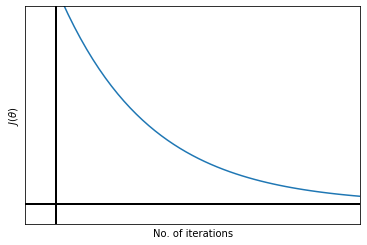

In [9]:
# Decreasing cost function
plt.figure(figsize=(6, 4))
x = np.linspace(0, 10)
plt.plot(x, 11 * np.exp(-x / 3), label='')
plt.axvline(x=0, c='k', lw=2)
plt.axhline(y=0, c='k', lw=2)
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labeltop=False,
    labelleft=False,
    labelright=False)
plt.axis([-1, 10, -1, 10])
plt.xlabel('No. of iterations')
plt.ylabel(r'$J(\theta)$')

Regarding the gradient descent algorithm:

- The cost function $J(\boldsymbol{\theta})$ should decrease after every iteration.
- The number of iterations it takes to converge varies significantly across different applications.

If the cost function increases:

Text(0, 0.5, '$J(\\theta)$')

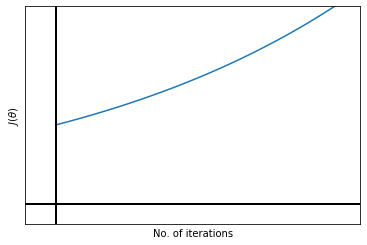

In [10]:
# Increasing cost function
plt.figure(figsize=(6, 4))
x = np.linspace(0, 10)
plt.plot(x, 4 * np.exp(x / 10), label='')
plt.axvline(x=0, c='k', lw=2)
plt.axhline(y=0, c='k', lw=2)
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labeltop=False,
    labelleft=False,
    labelright=False)
plt.axis([-1, 10, -1, 10])
plt.xlabel('No. of iterations')
plt.ylabel(r'$J(\theta)$')

Then it is a clear signal that the gradient descent algorithm is not working. The reason is that the selected learning rate $\alpha$ is too big.

> For **sufficently small** $\alpha$, $J(\theta)$ should decrease on every iteration.

> But if $\alpha$ is too small, gradient descent can be slow to converge.

## 3. Features and Polynomial Regression

### Features generation

It is not mandatory to use the data "as is". We can perform some operations on the data to obtain new features that may make more sense to use.

For instance, consider the case where we are given the frontage and the depth of a house in order to predict its price. As before, we can use a hypothesis function like

$$
h_{\theta}(\boldsymbol{x}) = \theta_0 + \theta_1 \times frontage + \theta_2 \times depth.
$$

On the other hand, we may think that what actually determines the price of the house is its size. Then, we can define a feature $x = frontage \times depth$ and use the hypothesis function

$$
h_{\theta}(x) = \theta_0+ \theta_1 x.
$$

### Polynomial features

We can use all the machinery we have developed for multivariate linear regression to fit polynomial hypotheses to our data.

For instance, we could try a cubic hypothesis like:

$$
h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3.
$$

We can think of it as a multivariate hypothesis:

\begin{align}
h_{\theta}(x) & = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 \\
              & = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3
\end{align}

with $x_1 = x$, $x_2 = x^2$ and $x_3 = x^3$.


If we choose the features like this, then the feature scaling becomes very important. For example, if $x$ is the house size, then we have that

$$
x_1 \sim 1000
$$

$$
x_2 \sim 1000000
$$

$$
x_3 \sim 1000000000
$$

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez. Based on the content of the Machine Learning course offered through coursera by Prof. Andrew Ng.
</footer>